In [411]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix
from sklearn.model_selection import train_test_split



(2000, 2)


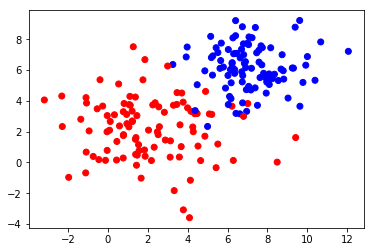

In [423]:
X1=2*np.random.randn(1000,2)+np.array([2,2])
X2=1.5*np.random.randn(1000,2)+np.array([7,6])
data=np.concatenate((X1,X2),axis=0).reshape((2000,2))
print(data.shape)
plt.show()
Y=np.concatenate((np.ones(1000),(-1*np.ones(1000)))).reshape((2000,1))
X_train, X_test, y_train, y_test = train_test_split( data, Y, test_size=0.9, random_state=42)
c=[]
for item in y_train:
    if item==1:
        c.append('red')
    else:
        c.append('blue')
plt.scatter(X_train.T[0,:],X_train.T[1,:],c=c)
plt.show()

In [413]:
X=X_train.T
Y=y_train
m,n= X.shape
C=1
A1=np.zeros((n,n))
for i in range(n):
    for j in range(n):
        A1[i,j]=np.matmul(X[:,i].T,X[:,j])
A1=A1+(1/C)*np.identity(n)
for i in range(n):
    for j in range(n):
        A1[i,j]=Y[i]*Y[j]*A1[i,j]
Aineq=matrix(-1*np.identity(n))
bineq=matrix(np.zeros((n,1)))


In [414]:
f=-1*np.ones((n,1))
Aeq=matrix(Y.T,tc='d')
beq=matrix(np.array([[0]]),tc="d")
beq


<1x1 matrix, tc='d'>

In [415]:
from cvxopt import solvers
sol = solvers.qp(matrix(A1,tc='d'),matrix(f,tc='d'),Aineq,bineq,Aeq,beq)




     pcost       dcost       gap    pres   dres
 0: -1.8399e+01 -4.7879e+01  5e+02  2e+01  2e+00
 1: -2.0678e+01 -3.1966e+01  1e+02  4e+00  3e-01
 2: -1.2152e+01 -1.2797e+01  1e+01  5e-01  4e-02
 3: -8.7700e+00 -9.6781e+00  1e+00  2e-02  1e-03
 4: -8.9640e+00 -9.1115e+00  2e-01  2e-03  1e-04
 5: -9.0500e+00 -9.0651e+00  2e-02  9e-05  7e-06
 6: -9.0611e+00 -9.0620e+00  9e-04  2e-06  2e-07
 7: -9.0618e+00 -9.0618e+00  4e-05  2e-08  2e-09
 8: -9.0618e+00 -9.0618e+00  4e-06  3e-10  2e-11
Optimal solution found.


In [416]:
alpha=np.array(sol['x'])
w=np.zeros((1,2))
for i in range(n):
    w=w+alpha[i]*Y[i]*X[:,i]

w=w.T

In [417]:

index_alpha=[]
for i in range(len(alpha)):
    if alpha[i][0]>.5 and C>alpha[i][0]:
        index_alpha.append(i)

sum_X=(X[:,index_alpha].sum(1)).reshape((2,1))
b=(-1/len(index_alpha))*np.matmul(w.T,sum_X)



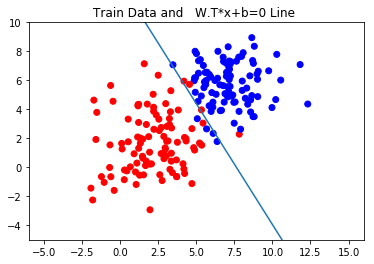

In [426]:
x1=np.linspace(-5,15,200)
x2=-(w[0]/w[1])*x1-b[0]/(w[1])
plt.scatter(X[0,:],X[1,:],c=c)
plt.plot(x1,x2,)
plt.ylim([-5, 10])
plt.title("Train Data and   W.T*x+b=0 Line ")
plt.show()


In [419]:
#k=np.where(alpha>.4)
#alpha_sv=alpha[k]
#X_sv=alpha_sv*y_train[k]*X_train[k[0],:].T
#np.matmul(X_sv.T,X_test.T).sum(0)+b

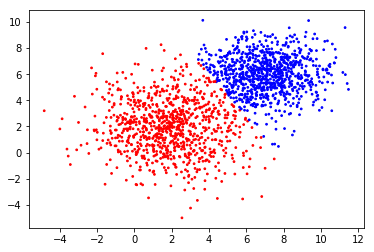

In [420]:
y_predicted=np.sign(np.matmul(w.T,X_test.T).sum(0)+b)
color=[]
for item in y_predicted[0]:
       # print(item)
        if item==1:
            color.append('red')
        else:
            color.append('blue')
    
plt.scatter(X_test[:,0],X_test[:,1],c=color,s=3)
plt.show()

In [421]:
k_error=0
for i in range(1800):
    
    if y_predicted[0][i]!=y_test[i][0]:
        k_error+=1

error_percent=k_error/18
print("Error in percent: ",error_percent,'%')

Error in percent:  3.7777777777777777 %
